## Catalog Implementation

KO.GAZK and KO.MRMT stations for 09-09-2020 

In [1]:
import obspy

In [2]:
gazk_st = obspy.read("gazk.mseed")
gazk_st

119 Trace(s) in Stream:

KO.GAZK..HHE | 2020-09-08T23:58:18.340000Z - 2020-09-09T00:10:19.610000Z | 100.0 Hz, 72128 samples
...
(117 other traces)
...
KO.GAZK..HHZ | 2020-09-09T22:40:24.490000Z - 2020-09-09T22:52:26.110000Z | 100.0 Hz, 72163 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [3]:
gazk_st.merge()

3 Trace(s) in Stream:
KO.GAZK..HHE | 2020-09-08T23:58:18.340000Z - 2020-09-09T22:52:27.700000Z | 100.0 Hz, 8244937 samples (masked)
KO.GAZK..HHN | 2020-09-08T23:58:17.630000Z - 2020-09-09T22:52:26.010000Z | 100.0 Hz, 8244839 samples (masked)
KO.GAZK..HHZ | 2020-09-08T23:58:17.730000Z - 2020-09-09T22:52:26.110000Z | 100.0 Hz, 8244839 samples (masked)

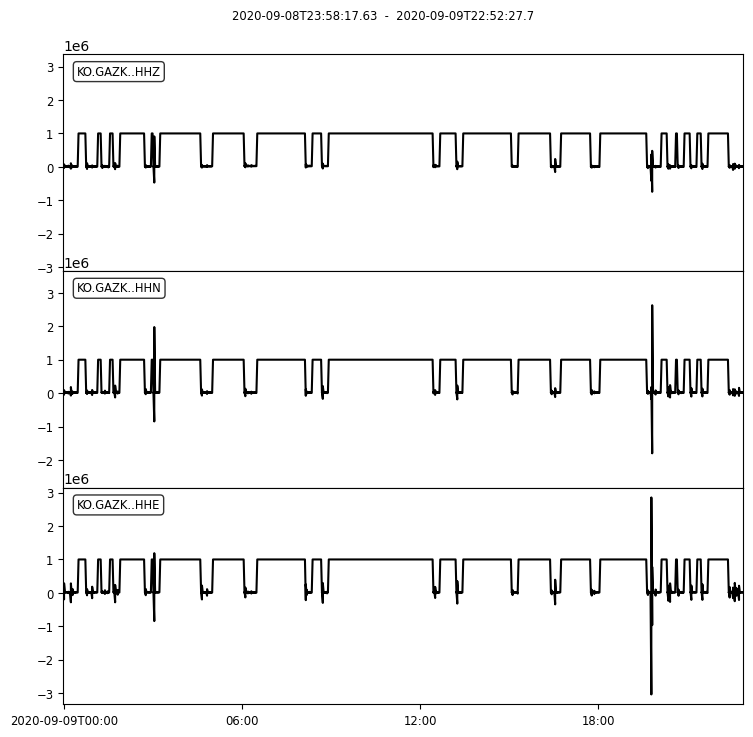

In [4]:
gazk_st.plot();

In [5]:
import sys
sys.path.append('/home/ege/rawcovar/npy_analysis/')
from mseed2npy import stream2np

In [ ]:
output_dir = './'
stream2np(gazk_st, output_dir)

Checking original stream for NaNs:
Trace 0: KO.GAZK..HHE has 6103826 NaN values
Trace 1: KO.GAZK..HHN has 6103542 NaN values
Trace 2: KO.GAZK..HHZ has 6103989 NaN values
After merging split traces: 3 Trace(s) in Stream:
KO.GAZK..HHE | 2020-09-08T23:58:18.340000Z - 2020-09-09T22:52:27.700000Z | 100.0 Hz, 8244937 samples
KO.GAZK..HHN | 2020-09-08T23:58:17.630000Z - 2020-09-09T22:52:26.010000Z | 100.0 Hz, 8244839 samples
KO.GAZK..HHZ | 2020-09-08T23:58:17.730000Z - 2020-09-09T22:52:26.110000Z | 100.0 Hz, 8244839 samples
Common time range: 2020-09-08T23:58:18.340000Z to 2020-09-09T22:52:26.010000Z
Processing 2748 potential time windows of 30 seconds each
Found 1798 complete windows with no NaN values across all channels
Stream saved at: ./KO.GAZK.2020-09-08T23:58:18.340000Z-2020-09-09T22:52:26.010000Z.npy
Shape of saved data: (1798, 3000, 3)


In [7]:
1798/2748

0.6542940320232896

In [8]:
import numpy as np
gazk_npy = np.load('KO.GAZK.2020-09-08T23:58:18.340000Z-2020-09-09T22:52:26.010000Z.npy')

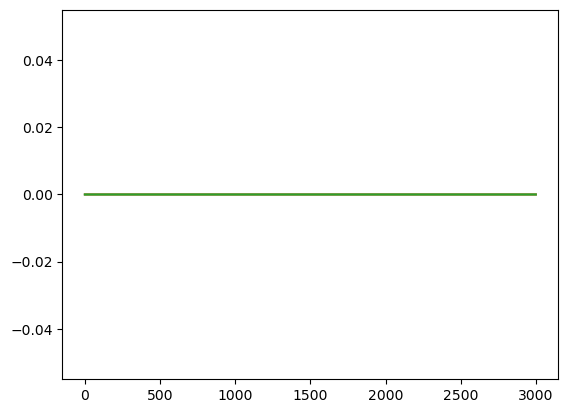

In [21]:
import matplotlib.pyplot as plt

plt.plot(gazk_npy[100])

In [8]:
import numpy as np
import obspy

def advanced_nan_detection(stream):
    """
    Advanced NaN detection with multiple strategies
    """
    has_nans = False
    
    for i, tr in enumerate(stream):
        # Strategy 1: Direct NumPy isnan
        direct_nan_count = np.isnan(tr.data).sum()
        
        # Strategy 2: Check for numpy masked arrays
        is_masked_array = np.ma.is_masked(tr.data)
        masked_nan_count = np.ma.count_masked(tr.data) if is_masked_array else 0
        
        # Strategy 3: Additional checks for problematic values
        inf_count = np.isinf(tr.data).sum()
        none_count = np.count_nonzero(tr.data == None)
        
        # Print detailed information
        print(f"Trace {i}: {tr.id}")
        print(f"  - Direct NaN count: {direct_nan_count}")
        print(f"  - Masked array NaNs: {masked_nan_count}")
        print(f"  - Infinite values: {inf_count}")
        print(f"  - None values: {none_count}")
        print(f"  - Data type: {tr.data.dtype}")
        print(f"  - Data shape: {tr.data.shape}")
        
        # Update NaN flag
        if direct_nan_count > 0 or masked_nan_count > 0 or inf_count > 0 or none_count > 0:
            has_nans = True
    
    return has_nans

def print_data_details(stream):
    """
    Print detailed information about the stream
    """
    print("Stream Details:")
    for i, tr in enumerate(stream):
        print(f"\nTrace {i}:")
        print(f"  - Network: {tr.stats.network}")
        print(f"  - Station: {tr.stats.station}")
        print(f"  - Channel: {tr.stats.channel}")
        print(f"  - Sampling Rate: {tr.stats.sampling_rate}")
        print(f"  - Start Time: {tr.stats.starttime}")
        print(f"  - End Time: {tr.stats.endtime}")

#Example usage

advanced_nan_detection(gazk_st)
print_data_details(gazk_st)

Trace 0: KO.GAZK..HHE
  - Direct NaN count: 0
  - Masked array NaNs: 6103826
  - Infinite values: 0
  - None values: 0
  - Data type: int32
  - Data shape: (8244937,)
Trace 1: KO.GAZK..HHN
  - Direct NaN count: 0
  - Masked array NaNs: 6103542
  - Infinite values: 0
  - None values: 0
  - Data type: int32
  - Data shape: (8244839,)
Trace 2: KO.GAZK..HHZ
  - Direct NaN count: 0
  - Masked array NaNs: 6103989
  - Infinite values: 0
  - None values: 0
  - Data type: int32
  - Data shape: (8244839,)
Stream Details:

Trace 0:
  - Network: KO
  - Station: GAZK
  - Channel: HHE
  - Sampling Rate: 100.0
  - Start Time: 2020-09-08T23:58:18.340000Z
  - End Time: 2020-09-09T22:52:27.700000Z

Trace 1:
  - Network: KO
  - Station: GAZK
  - Channel: HHN
  - Sampling Rate: 100.0
  - Start Time: 2020-09-08T23:58:17.630000Z
  - End Time: 2020-09-09T22:52:26.010000Z

Trace 2:
  - Network: KO
  - Station: GAZK
  - Channel: HHZ
  - Sampling Rate: 100.0
  - Start Time: 2020-09-08T23:58:17.730000Z
  - End T

In [9]:
np.ma.any(gazk_st[0].data)

True

In [10]:
np.ma.count_masked(gazk_st[0].data)

6103826

In [11]:
np.shape(gazk_st[0].data)[0]

8244937

In [12]:
np.ma.count_masked(gazk_st[0].data) / np.shape(gazk_st[0].data)[0]

0.7403120242155883

In [16]:
np.isnan(gazk_st[0].data).sum(), np.ma.count_masked(gazk_st[0].data).sum()

(0, 6103826)

## Create y Data

Create precise labels with only the exact arrival time marked as 1

In [ ]:
from create_ytest import create_earthquake_labels
import numpy as np

station_arrivals_path = 'station_arrivals.csv'

precise_labels, condensed_labels = create_earthquake_labels(station_arrivals_path, specific_station='GAZK',start_time='2020-09-08',end_time='2020-09-10')

np.save('GAZK_precise_labels.npy', precise_labels)
np.save('GAZK_y_test.npy', condensed_labels)

print(f"Precise labels saved with shape: {precise_labels.shape}")
print(f"Condensed labels saved with shape: {condensed_labels.shape}")
print(f"Number of positive windows: {np.sum(condensed_labels)}")

total_windows = len(condensed_labels)
positive_windows = np.sum(condensed_labels)
print(f"Class distribution: {positive_windows}/{total_windows} positive windows " 
        f"({positive_windows/total_windows*100:.2f}%)")


Precise labels saved with shape: (3149, 3000)
Condensed labels saved with shape: (3149,)
Number of positive windows: 63
Class distribution: 63/3149 positive windows (2.00%)


In [9]:
precise_labels[0]

array([1, 0, 0, ..., 0, 0, 0])

In [10]:
import matplotlib.pyplot as plt

In [11]:
event_labels = precise_labels[np.sum(precise_labels, axis=1) > 0,:]

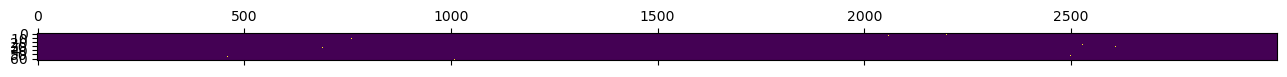

In [12]:
plt.matshow(event_labels)

In [13]:
import pandas as pd
pd.Series(np.sum(event_labels, axis=1)).value_counts()

1    63
Name: count, dtype: int64

In [14]:
event_labels[np.sum(event_labels, axis=1)>1].shape

(0, 3000)

In [15]:
np.sum(precise_labels, axis=1).sum()

63

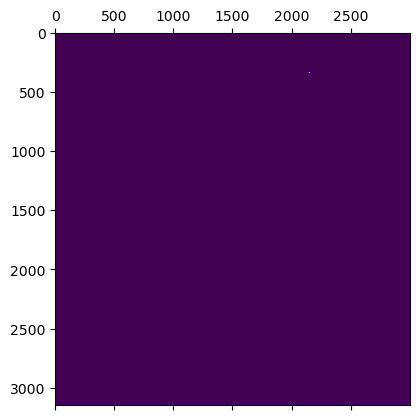

In [16]:
plt.matshow(precise_labels[:10000,:])

In [17]:
condensed_labels[0]

1

Normally, Y_test should have shape (num_samples,) the "condensed" version here. The precise version "preserves" station arrival time.